In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib widget
#%matplotlib qt


# 2. Dyskretyzacja

<h3> 1. Przygotuj funkcję generującą zdyskretyzowany sygnał sinus na podstawie parametrów:
•Częstotliwość sygnału f
•Częstotliwość próbkowania Fs</h23>

<h3>2. Funkcja powinna zwracać tablice:
•t - tablicę ”czasu” (zakres od 0 do 1 z krokiem równym częstości próbkowania: dt = 1/Fs)
•s - wartości wygenerowanego sygnału sinus: s(t) = sin (2πft)</h3>


In [2]:

def generuj_czas(fs,Tc=1):
    N=int(Tc*fs)
    t=np.arange(N)/fs
    return t

def my_sinus(f,fs,Tc=1):
    t=generuj_czas(fs,Tc)
    y=np.sin(2*np.pi*f*t)
    return [t,y]

<h3>3. Wyświetl wykresy zawierające sygnał o częstotliwości 10Hz za pomocą
próbkowania: 20Hz
•21Hz
•30Hz
•45Hz
•50Hz
•100Hz
•150Hz
•200Hz
•250Hz
•1000Hz</h3>

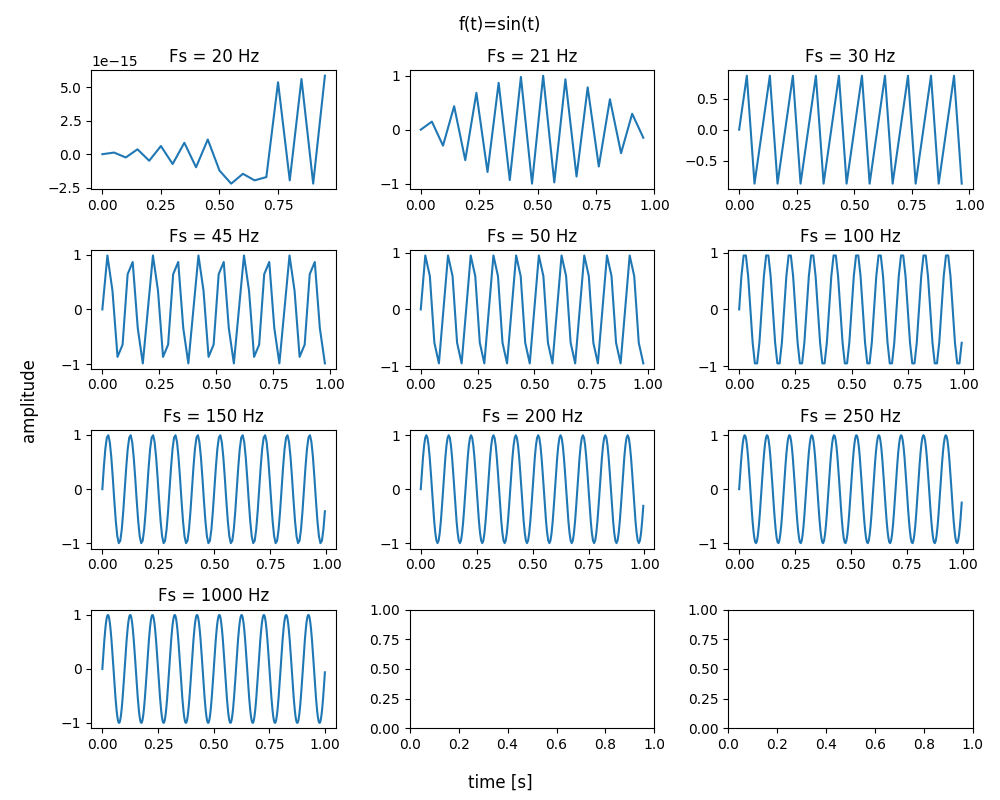

In [3]:
fig,ax=plt.subplots(4,3,figsize=(10,8))
ax=np.ravel(ax)
f=10
Fs=[20,21,30,45,50,100,150,200,250,1000]

for i in range(len(Fs)):
    y=my_sinus(f,Fs[i])
    ax[i].plot(y[0],y[1])
    ax[i].set_title(f'Fs = {Fs[i]} Hz')
    
fig.supylabel('amplitude')
fig.supxlabel('time [s]')
fig.suptitle('f(t)=sin(t)')
fig.tight_layout()
plt.show()

<h3>4. Czy istnieje twierdzenie, które określa z jaką częstotliwością należy
próbkować, aby móc wiernie odtworzyć sygnał? Jak się nazywa?</h3>

twierdzenie Nyquista–Shannona

<h3>5. Jak nazywa się zjawisko, które z powodu błędnie dobranej częstotliwości próbkowania powoduje błędną interpretację sygnału</h3>

aliasing

<h3>6. Znajdź za pomocą internetu obraz, na którym występuje wskazane
zjawisko (przy wyświetlaniu go w znacznie mniejszej rozdzielczości).
•Obrazek oryginalny powinien być wysokiej rozdzielczości
•Plik powienien być zapisany w formacie png</h3>

<h3>7. Sprawdź jak python radzi sobie z wyświetleniem takiego obrazu i jakie opcje można przy tym użyć (https://matplotlib.org/3.1.1/
gallery/images_contours_and_fields/interpolation_methods.html)</h3>

# 3. Kwantyzacja

<h3>1. Wczytaj wcześniej znaleziony obrazek</h3>

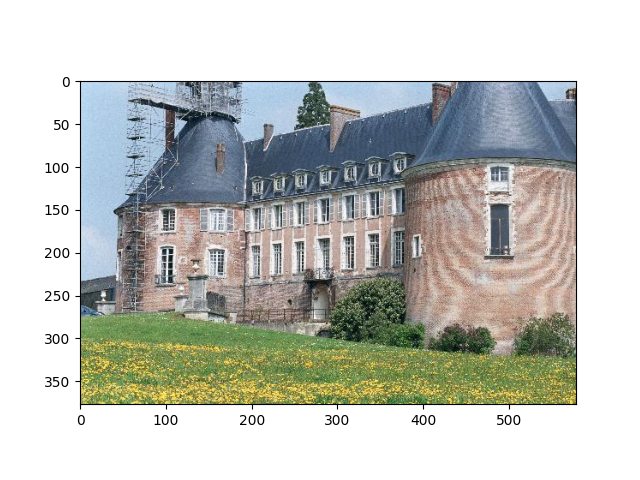

In [4]:
img = plt.imread('image1.jpg',format='jpg')
plt.figure()
plt.imshow(img)
plt.show()

<h3>2. Wykonaj polecenie, które zwróci ile wymiarów ma wczytana macierz
(obrazek)</h3>

In [5]:
print(img.ndim)

3


<h3>3. Wykonaj polecenie, które zwróci iloma wartościami jest opisywany pojedynczy piksel (inaczej: z ilu wartości składa się najgłębszy wymiar)</h3>

In [6]:
print(img.shape[-1])

3


<h3>4. Przekształć obraz do skali szarości za pomocą 3 różnych metod (zapisz
jako 3 różne macierze):<br>
•Wyznaczenie jasności piksela: (max(R,G,B) + min(R,G,B))/2<br>
•Uśrednienie wartości piksela: (R + G + B)/3<br>
•Wyznaczenie luminancji piksela: 0.21R + 0.72G + 0.07B</h3>

In [7]:
im1=(np.amax(img,axis=2) + np.amax(img,axis=2))/2
im2=(img[:,:,0] + img[:,:,1] + img[:,:,2])/3
im3=0.21*img[:,:,0] + 0.72*img[:,:,1] + 0.07*img[:,:,2]

<h3>5. Wygeneruj histogram dla każdego z otrzymanych „szarych” obrazów (funkcja histogram z pakietu numpy)</h3>

<h3>6. Dla dowolnego z wygenerowanych obrazów, za pomocą parametru bins
zredukuj liczbę kolorów na histogramie do 16 i wyświetl zakresy nowych kolorów</h3>

In [8]:
bins_count=30

a1,b1=np.histogram(im1,bins=bins_count, range=(0,256),density=True)
a2,b2=np.histogram(im2,bins=bins_count, range=(0,256),density=True)
a3,b3=np.histogram(im3,bins=bins_count, range=(0,256),density=True)

print(b1)

[  0.           8.53333333  17.06666667  25.6         34.13333333
  42.66666667  51.2         59.73333333  68.26666667  76.8
  85.33333333  93.86666667 102.4        110.93333333 119.46666667
 128.         136.53333333 145.06666667 153.6        162.13333333
 170.66666667 179.2        187.73333333 196.26666667 204.8
 213.33333333 221.86666667 230.4        238.93333333 247.46666667
 256.        ]


<h3>7. Stwórz kolejną macierz (obrazek) ze zredukowaną liczbą kolorów (jako
nową wartość piksela przyjmnij środek przedziału zwróconego przez
funkcję histogramu)</h3>

In [9]:
reduced_count=16
img_to_reduce=im3
a4,b4=np.histogram(img_to_reduce, bins=reduced_count, range=(0,256), density=True)
indexes=np.digitize(img_to_reduce,b4)-1
middle_bins=np.array((b4[1:]+b4[:-1])/2).astype(int)

reduced=np.array(middle_bins[indexes])

<h3>8. Wyświetl wszystkie obrazy i ich histogramy</h3>

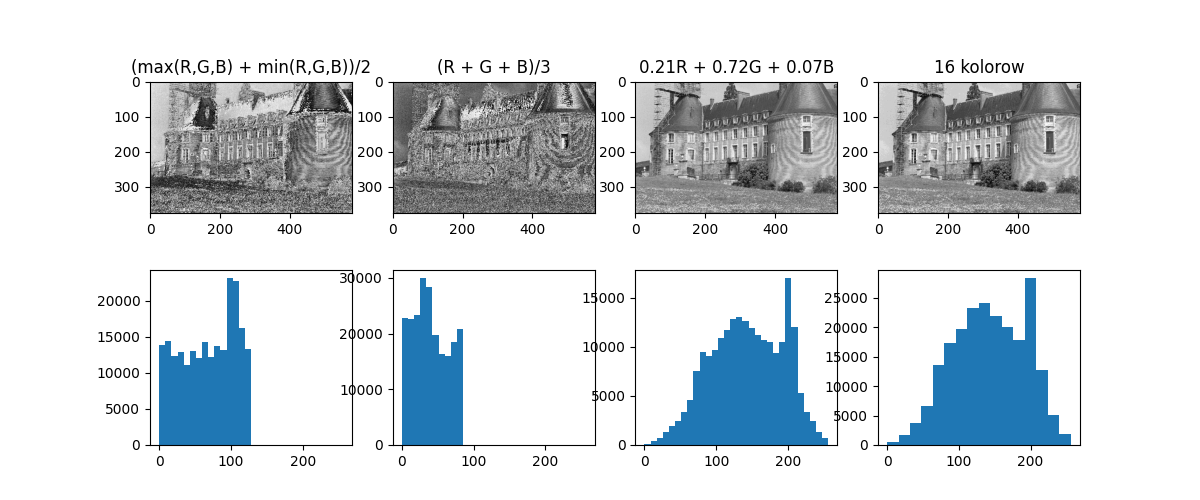

In [10]:

fig,ax=plt.subplots(2,4,figsize=(12,5))
ax=ax.ravel()

ax[0].imshow(im1,cmap='gray')
ax[0].set_title('(max(R,G,B) + min(R,G,B))/2')
ax[1].imshow(im2,cmap='gray')
ax[1].set_title('(R + G + B)/3')
ax[2].imshow(im3,cmap='gray')
ax[2].set_title('0.21R + 0.72G + 0.07B')
ax[3].imshow(reduced,cmap='gray')
ax[3].set_title(f'{reduced_count} kolorow')

ax[4].hist(im1.ravel(), bins=b1, range=(0,256))
ax[5].hist(im2.ravel(), bins=b2, range=(0,256))
ax[6].hist(im3.ravel(), bins=b3, range=(0,256))
ax[7].hist(reduced.ravel(), bins=b4, range=(0,256))

plt.show()

# 4 Binaryzacja

<h3>1. Pobierz z internetu obraz przedstawiający obiekt na niejednorodnym tle (np. gradiencie)</h3>

<h3>. Wczytaj obraz, zamień go na skalę szarości za pomocą jednej z wcześniej stosowanych metod i wygeneruj histogram</h3>

bins [ 29.32    38.3472  47.3744  56.4016  65.4288  74.456   83.4832  92.5104
 101.5376 110.5648 119.592  128.6192 137.6464 146.6736 155.7008 164.728
 173.7552 182.7824 191.8096 200.8368 209.864  218.8912 227.9184 236.9456
 245.9728 255.    ]


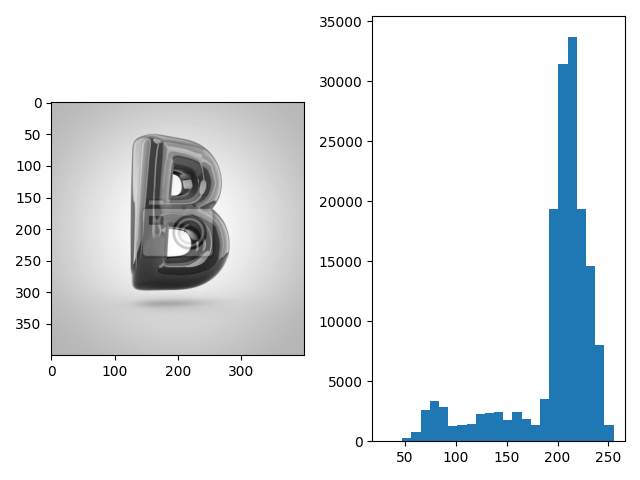

In [11]:
fig,ax=plt.subplots(1,2)
img2=plt.imread("img2.jpg",format='jpg')
img2_gray=0.21*img2[:,:,0] + 0.72*img2[:,:,1] + 0.07*img2[:,:,2]

w,b=np.histogram(img2_gray,bins=25)
print('bins',b)

ax[0].imshow(img2_gray,cmap='gray')
ax[1].hist(img2_gray.ravel(),bins=b)
fig.tight_layout()

plt.show()

<h3>3. Napisz funkcję, która na podstawie histogramu określi punkt progowania (zazwyczaj lokalne minimum między dwoma ‘klasami‘ kolorów, tak jak na poniższym obrazku’)</h3>

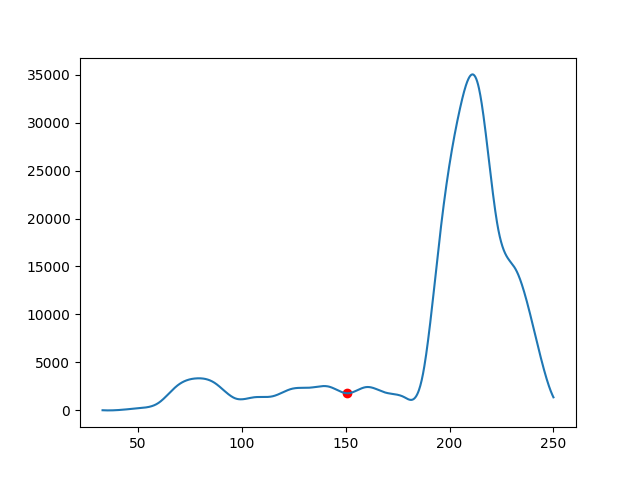

150.88193711682288


In [12]:
import scipy.interpolate
import scipy.optimize._minimize

def progowanie(w,b):
    half=(min(b)+max(b))/2
    middle_bins=np.array((b[1:]+b[:-1])/2).astype(int)
    f=scipy.interpolate.interp1d(middle_bins,w,kind='cubic')
    
    try:
        r=scipy.optimize._minimize.minimize(f,half,method='Powell')
    except:
        return half
    xmin=r.x[0]
    
    plt.figure()
    x=np.linspace(min(middle_bins),max(middle_bins),1000)
    plt.plot(x,f(x))
    plt.scatter(xmin,f(xmin),color='red')
    plt.show()
    
    return xmin
    
prog=progowanie(w,b)
print(prog)

<h3>4. Zbinaryzuj (ustaw wartości na 0 lub 1) wartości pikseli obrazka zgodnie z otrzymanym progiem</h3>

In [13]:
img_binary=np.where(img2_gray<prog,0,1)

<h3>5. Wyświetl obraz z wysegmentowanym obiektem (segmentacja, czyli usunięcie niepotrzebnych elementów, jak np. tła i uwypukleniu tych ważniejszych)</h3>

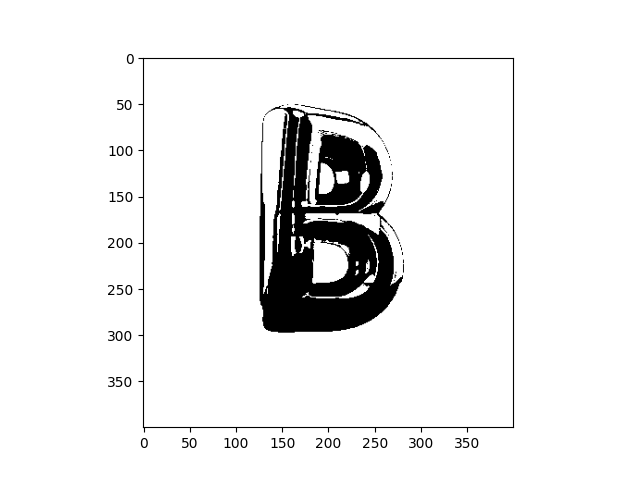

In [14]:
plt.figure()
plt.imshow(img_binary,cmap='gray')
plt.show()